In [47]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from apriori_python import apriori
from apyori import apriori
from efficient_apriori import apriori
from fpgrowth_py import fpgrowth

In [15]:
pip install apriori_python

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=f1ac39198913048df607e793289f06ca53007df25d39d157da947ceef976312e
  Stored in directory: c:\users\79537\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install fpgrowth_py

Note: you may need to restart the kernel to use updated packages.


In [24]:
market = pd.read_csv('Market_Basket_Optimisation.csv',sep=',')
data = pd.read_csv('data.csv',sep=',')

Относительная частота

<Axes: >

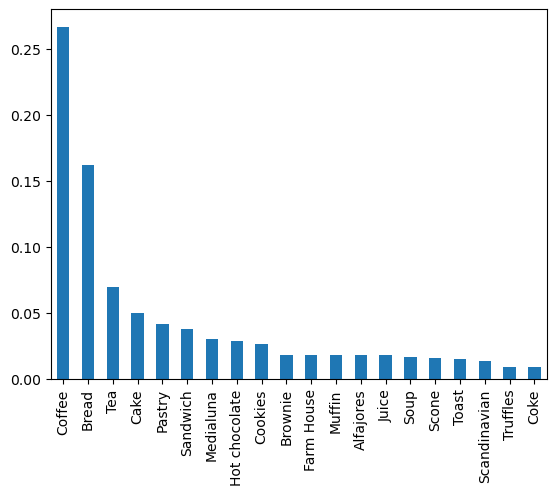

In [58]:
data.stack().value_counts(normalize=True)[0:20].plot(kind='bar')

In [ ]:
Фактическая частота

<Axes: >

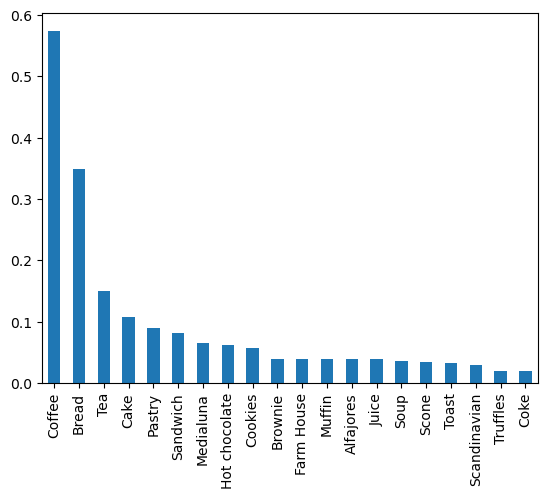

In [59]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[0:20].plot(kind='bar')

In [65]:
from apriori_python import apriori
trans = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    trans.append(row)
t=[]
start=time.perf_counter()

t1,rules=apriori(trans,minSup=0.01,minConf=0.42)
time1=(time.perf_counter()-start)
t.append(time1)
rules

[[{'Soup'}, {'Coffee'}, 0.4601226993865031],
 [{'Muffin'}, {'Coffee'}, 0.489010989010989],
 [{'Brownie'}, {'Coffee'}, 0.49076517150395776],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Scone'}, {'Coffee'}, 0.5229357798165137],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Juice'}, {'Coffee'}, 0.5342465753424658],
 [{'Alfajores'}, {'Coffee'}, 0.5406976744186046],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692],
 [{'Spanish Brunch'}, {'Coffee'}, 0.5988372093023255],
 [{'Toast'}, {'Coffee'}, 0.7044025157232704]]

In [66]:
from apyori import apriori
start=time.perf_counter()
rules=apriori(transactions=trans,min_support=0.01,min_confidence=0.42,
             min_lift=1.0001)
res=list(rules)
time2=(time.perf_counter()-start)
t.append(time2)

for result in res:
    for subset in result[2]:
        print(subset[0],subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};".format(result[1],subset[2],subset[3]))
        print()

frozenset({'Alfajores'}) frozenset({'Coffee'})
Support: 0.01951731374606506; Confidence: 0.5406976744186047; Lift: 1.137996651327143;

frozenset({'Brownie'}) frozenset({'Coffee'})
Support: 0.01951731374606506; Confidence: 0.4907651715039578; Lift: 1.0329046122863776;

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834; Lift: 1.109079618532724;

frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.02801678908709339; Confidence: 0.5184466019417475; Lift: 1.0911652200761603;

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.02938090241343127; Confidence: 0.5072463768115942; Lift: 1.0675923080862397;

frozenset({'Juice'}) frozenset({'Coffee'})
Support: 0.020461699895068207; Confidence: 0.5342465753424658; Lift: 1.124419139358149;

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475; Confidence: 0.5692307692307693; Lift: 1.1980497417776572;

frozenset({'Muffin'}) frozenset({'Coffee'})
Support: 0.018

In [67]:
from efficient_apriori import apriori
start=time.perf_counter()
itemsets, rules = apriori(trans, min_support=0.01,min_confidence=0.42)
time3=(time.perf_counter()-start)
t.append(time3)
for i in range(len(rules)):
    print(rules[i])

{Alfajores} -> {Coffee} (conf: 0.541, supp: 0.020, lift: 1.138, conv: 1.143)
{Brownie} -> {Coffee} (conf: 0.491, supp: 0.020, lift: 1.033, conv: 1.031)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.020, lift: 1.124, conv: 1.127)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Muffin} -> {Coffee} (conf: 0.489, supp: 0.019, lift: 1.029, conv: 1.027)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Scone} -> {Coffee} (conf: 0.523, supp: 0.018, lift: 1.101, conv: 1.100)
{Soup} -> {Coffee} (conf: 0.460, supp: 0.016, lift: 0.968, conv: 0.972)
{Spanish Brunch} -> {Coffee} (conf: 0.599, supp: 0.011, lift: 1.260, conv: 1.308)
{Toast} -> {Coffee}

In [69]:
from fpgrowth_py import fpgrowth
start=time.perf_counter()
items,rules = fpgrowth(trans,minSupRatio=0.01,minConf=0.52)

time4=(time.perf_counter()-start)
t[2]=time4
#t.append(time4)
for i in range(len(rules)):
    print(rules[i])

[{'Tiffin'}, {'Coffee'}, 0.547945205479452]
[{'Spanish Brunch'}, {'Coffee'}, 0.5988372093023255]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]


[2.3216868001036346, 0.04128230002243072, 1.5675854999572039, 1.5286945999832824]


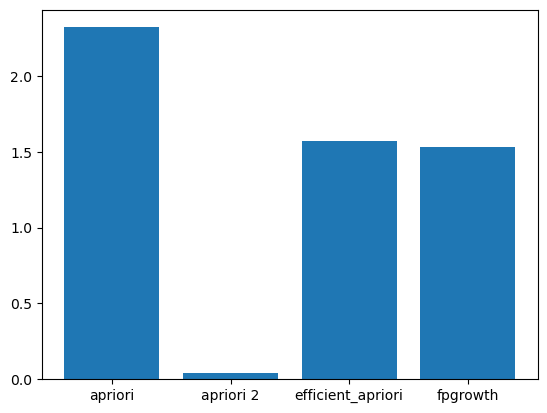

In [70]:
print(t)
plt.bar(['apriori','apriori 2','efficient_apriori','fpgrowth'],t)
plt.show()